In [61]:
from ipywidgets import IntText, Layout
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

In [72]:
style = {'description_width': '300px'}
layout = Layout(width='400px')

p0sum = IntText(value=0, description='Time when parallel leader finished sum', style=style, layout=layout)
p1sum = IntText(value=0, description='Time when parallel asst 1 finished sum', style=style, layout=layout)
p2sum = IntText(value=0, description='Time when parallel asst 2 finished sum', style=style, layout=layout)
p3sum = IntText(value=0, description='Time when parallel asst 3 finished sum', style=style, layout=layout)
ssum = IntText(value=0, description='Time when serial finished sum', style=style, layout=layout)

p1del = IntText(value=0, description='Time when parallel asst 1 delivered sum', style=style, layout=layout)
p2del = IntText(value=0, description='Time when parallel asst 2 delivered sum', style=style, layout=layout)
p3del = IntText(value=0, description='Time when parallel asst 3 delivered sum', style=style, layout=layout)

pdone = IntText(value=0, description='Time when parallel calculations done', style=style, layout=layout)
sdone = IntText(value=0, description='Time when serial calculations done', style=style, layout=layout)

display(p0sum)
display(p1sum)
display(p2sum)
display(p3sum)
display(ssum)
display(p1del)
display(p2del)
display(p3del)
display(pdone)
display(sdone)

IntText(value=0, description='Time when parallel leader finished sum', layout=Layout(width='400px'), style=Des…

IntText(value=0, description='Time when parallel asst 1 finished sum', layout=Layout(width='400px'), style=Des…

IntText(value=0, description='Time when parallel asst 2 finished sum', layout=Layout(width='400px'), style=Des…

IntText(value=0, description='Time when parallel asst 3 finished sum', layout=Layout(width='400px'), style=Des…

IntText(value=0, description='Time when serial finished sum', layout=Layout(width='400px'), style=DescriptionS…

IntText(value=0, description='Time when parallel asst 1 delivered sum', layout=Layout(width='400px'), style=De…

IntText(value=0, description='Time when parallel asst 2 delivered sum', layout=Layout(width='400px'), style=De…

IntText(value=0, description='Time when parallel asst 3 delivered sum', layout=Layout(width='400px'), style=De…

IntText(value=0, description='Time when parallel calculations done', layout=Layout(width='400px'), style=Descr…

IntText(value=0, description='Time when serial calculations done', layout=Layout(width='400px'), style=Descrip…

In [106]:
comm1 = p1del.value - p1sum.value
comm2 = p2del.value - p2sum.value
comm3 = p3del.value - p3sum.value
sync = max(p0sum.value, p1del.value, p2del.value, p3del.value)
idle0 = sync - p0sum.value
idle1 = sync - p1del.value
idle2 = sync - p2del.value
idle3 = sync - p3del.value
additional_parallel = pdone.value - sync
additional_serial = sdone.value - ssum.value

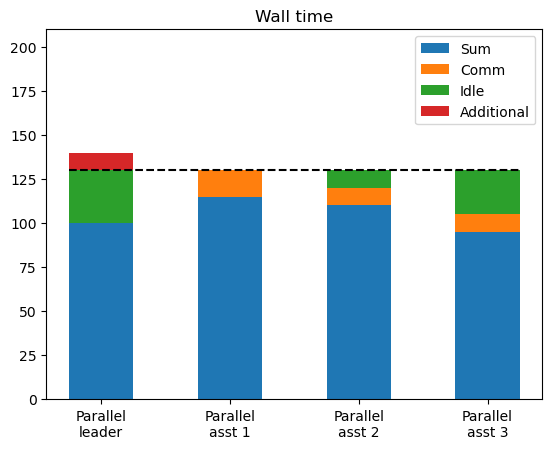

In [114]:
processors = (
    "Parallel\nleader",
    "Parallel\nasst 1",
    "Parallel\nasst 2",
    "Parallel\nasst 3",
)
weight_counts = {
    "Sum": np.array([p0sum.value, p1sum.value, p2sum.value, p3sum.value]),
    "Comm": np.array([0, comm1, comm2, comm3]),
    "Idle": np.array([idle0, idle1, idle2, idle3]),
    "Additional": np.array([additional_parallel, 0, 0, 0]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(processors, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_ylim(0, pdone.value*1.5)
ax.set_title("Wall time")
ax.legend(loc="upper right")
ax.plot([-0.25, 3.25], [sync, sync], "k--")

plt.show()

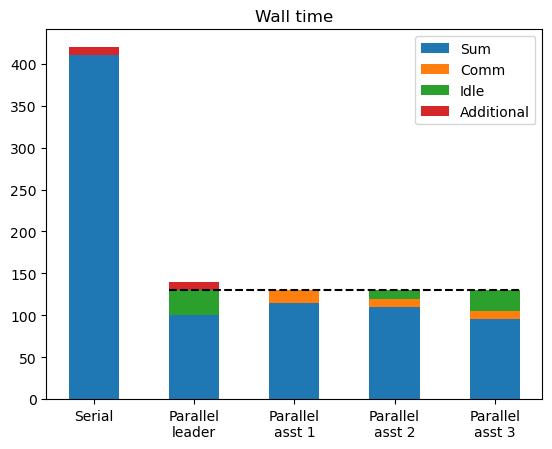

In [111]:
processors = (
    "Serial",
    "Parallel\nleader",
    "Parallel\nasst 1",
    "Parallel\nasst 2",
    "Parallel\nasst 3",
)
weight_counts = {
    "Sum": np.array([sdone.value, p0sum.value, p1sum.value, p2sum.value, p3sum.value]),
    "Comm": np.array([0, 0, comm1, comm2, comm3]),
    "Idle": np.array([0, idle0, idle1, idle2, idle3]),
    "Additional": np.array([additional_serial, additional_parallel, 0, 0, 0]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(processors, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Wall time")
ax.legend(loc="upper right")
ax.plot([0.75, 4.25], [sync, sync], "k--")

plt.show()